In [30]:
import numpy as np

def a(x,y):return np.sin(x,y)


def f(x, y): return ((np.pi**2)*x*(1-x)+2) * np.sin(np.pi*y)+((np.pi**2)*y*(1-y)+2)*np.sin(np.pi*x)
def ub(x): return 0
def ut(x): return 0
def ul(y): return 0
def ur(y): return 0

'''
def f(x, y): return x**2+y**2
def ub(x): return 0
def ut(x): return 0.5*x**2
def ul(y): return np.sin(np.pi*y)
def ur(y): return np.exp(np.pi)*np.sin(np.pi*y)+0.5*y**2
'''
def Restriction(inputsize):
    inputsize = int(inputsize)
    sqrtinputsize = int(np.sqrt(inputsize))
    outputsize = int((2**(np.log2(np.sqrt(inputsize)+1)-1)-1)**2)
    sqrtoutputsize = int(np.sqrt(outputsize))
    OUTPUT = np.zeros([outputsize, inputsize])
    for j in range(sqrtoutputsize):
        for i in range(sqrtoutputsize):
            OUTPUT[i+sqrtoutputsize*j][2*i+j*2*sqrtinputsize] = 1/16
            OUTPUT[i+sqrtoutputsize*j][1+2*i+j*2*sqrtinputsize] = 1/8
            OUTPUT[i+sqrtoutputsize*j][2+2*i+j*2*sqrtinputsize] = 1/16
            OUTPUT[i+sqrtoutputsize*j][sqrtinputsize+2*i+j*2*sqrtinputsize] = 1/8
            OUTPUT[i+sqrtoutputsize*j][1+sqrtinputsize+2*i+j*2*sqrtinputsize] = 1/4
            OUTPUT[i+sqrtoutputsize*j][2+sqrtinputsize+2*i+j*2*sqrtinputsize] = 1/8
            OUTPUT[i+sqrtoutputsize*j][2*sqrtinputsize+2*i+j*2*sqrtinputsize] = 1/16
            OUTPUT[i+sqrtoutputsize*j][1+2*sqrtinputsize +2*i+j*2*sqrtinputsize] = 1/8
            OUTPUT[i+sqrtoutputsize*j][2+2*sqrtinputsize+2*i+j*2*sqrtinputsize] = 1/16
    return np.matrix(OUTPUT)

def Interpolation(inputsize):
    inputsize = int(inputsize)
    OUTPUT = 4*np.transpose(Restriction(inputsize))
    return np.matrix(OUTPUT)


def Possion(inputsize):
    inputsize = int(inputsize)
    sqrtinputsize = int(np.sqrt(inputsize))
    A1 = 2*np.eye(sqrtinputsize)
    for i in range(sqrtinputsize-1):
        A1[i, i+1] = -1
        A1[i+1, i] = -1
    I = np.eye(sqrtinputsize)
    OUTPUT = ((sqrtinputsize+1)**2)*(np.kron(I, A1)+np.kron(A1, I))
    return np.matrix(OUTPUT)




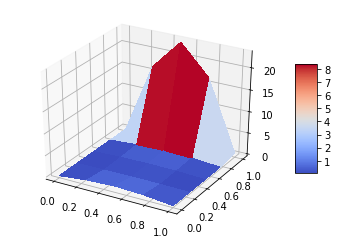

In [35]:
import numpy as np
from basicequation import *
from multigrid import *

inputsize = 9
inputsize = int(inputsize)
sqrtinputsize = int(np.sqrt(inputsize))
outputsize = int((2**(np.log2(np.sqrt(inputsize)+1)-1)-1)**2)
sqrtoutputsize = int(np.sqrt(outputsize))
h = 1/(sqrtinputsize+1)

[Xin, Yin] = np.meshgrid(np.linspace(h, 1-h, sqrtinputsize),
                         np.linspace(h, 1-h, sqrtinputsize))
[Xw, Yw] = np.meshgrid(np.linspace(0, 1, sqrtinputsize+2),
                       np.linspace(0, 1, sqrtinputsize+2))

B = np.zeros([sqrtinputsize, sqrtinputsize])
B = f(Xin, Yin)
B[0][:] = ub(np.linspace(h, 1-h, sqrtinputsize))
B[-1][:] = ut(np.linspace(h, 1-h, sqrtinputsize))
B[:][0] = ul(np.linspace(h, 1-h, sqrtinputsize))
B[:][-1] = ur(np.linspace(h, 1-h, sqrtinputsize))
B = B.reshape([inputsize,1])
A = Possion(inputsize)

R = Restriction(inputsize)
P = Interpolation(inputsize)

Uin = np.linalg.solve(A, B.reshape([inputsize, 1])).reshape([sqrtinputsize, sqrtinputsize])


Uw = np.zeros([sqrtinputsize+2,sqrtinputsize+2])
Uw[0][:] = ub(np.linspace(0, 1, sqrtinputsize+2))
Uw[-1][:] = ut(np.linspace(0, 1, sqrtinputsize+2))
Uw[:][0] = ul(np.linspace(0, 1, sqrtinputsize+2))
Uw[:][-1] = ur(np.linspace(0, 1, sqrtinputsize+2))
for i in range(sqrtinputsize):
    for j in range(sqrtinputsize):
        Uw[i+1][j+1] = Uin[i][j]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xw, Yw, Uw, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [34]:
print(A)
print(R)
print(P)

[[ 64. -16.   0. -16.  -0.   0.   0.   0.   0.]
 [-16.  64. -16.  -0. -16.  -0.   0.   0.   0.]
 [  0. -16.  64.   0.  -0. -16.   0.   0.   0.]
 [-16.  -0.   0.  64. -16.   0. -16.  -0.   0.]
 [ -0. -16.  -0. -16.  64. -16.  -0. -16.  -0.]
 [  0.  -0. -16.   0. -16.  64.   0.  -0. -16.]
 [  0.   0.   0. -16.  -0.   0.  64. -16.   0.]
 [  0.   0.   0.  -0. -16.  -0. -16.  64. -16.]
 [  0.   0.   0.   0.  -0. -16.   0. -16.  64.]]
[[0.0625 0.125  0.0625 0.125  0.25   0.125  0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625 0.125  0.25   0.125  0.0625 0.125  0.0625]]
